# 1 PANDAS PROFILING

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', message='Your specific warning message')

import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
from prettytable import PrettyTable


In [2]:
df= pd.read_csv('red_wine.csv') # read the dataframe into df

In [3]:
df.head(5)

,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,low
1,0.66,0.57,8.3,low
2,0.23,0.44,8.5,high
3,0.44,0.84,8.6,low
4,0.08,0.50,8.7,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   citric acid  571 non-null    float64
 1   sulphates    571 non-null    float64
 2   alcohol      571 non-null    float64
 3   type         571 non-null    object 
dtypes: float64(3), object(1)
memory usage: 18.0+ KB


In [5]:
from pandas_profiling import ProfileReport
# Create a profile report
profile = ProfileReport(df)

# Generate the report as an HTML file
profile.to_file("wine_data_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 2 MODELS EVALUATION

In [ ]:
# Encode the categorical 'type' column to numerical values
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

# Separate features and target
X = df.drop('type', axis=1)
y = df['type']

# Set a random seed for reproducibility
seed = 42

# Define a function to calculate AUC and accuracy
def calculate_metrics(model, X, y, metric):
    scores = cross_val_score(model, X, y, cv=KFold(n_splits=10, shuffle=True, random_state=seed), scoring=metric)
    return scores.mean()

# Create a table to store the results
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "AUC"]

# Baseline model: Majority class prediction
dummy = DummyClassifier(strategy="most_frequent")
dummy_accuracy = calculate_metrics(dummy, X, y, "accuracy")
dummy_auc = calculate_metrics(dummy, X, y, "roc_auc")
table.add_row(["Baseline", dummy_accuracy, dummy_auc])

# Logistic Regression
lr_model = LogisticRegression(random_state=seed)
lr_accuracy = calculate_metrics(lr_model, X, y, "accuracy")
lr_auc = calculate_metrics(lr_model, X, y, "roc_auc")
table.add_row(["Logistic Regression", lr_accuracy, lr_auc])

# Naive Bayes
nb_model = GaussianNB()
nb_accuracy = calculate_metrics(nb_model, X, y, "accuracy")
nb_auc = calculate_metrics(nb_model, X, y, "roc_auc")
table.add_row(["Naive Bayes", nb_accuracy, nb_auc])

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=seed)
dt_accuracy = calculate_metrics(dt_model, X, y, "accuracy")
dt_auc = calculate_metrics(dt_model, X, y, "roc_auc")
table.add_row(["Decision Tree", dt_accuracy, dt_auc])

# SVM with Linear Kernel
svm_linear_model = SVC(kernel='linear', random_state=seed)
svm_linear_accuracy = calculate_metrics(svm_linear_model, X, y, "accuracy")
svm_linear_auc = calculate_metrics(svm_linear_model, X, y, "roc_auc")
table.add_row(["SVM-Linear", svm_linear_accuracy, svm_linear_auc])

# SVM with RBF Kernel
svm_rbf_model = SVC(kernel='rbf', random_state=seed)
svm_rbf_accuracy = calculate_metrics(svm_rbf_model, X, y, "accuracy")
svm_rbf_auc = calculate_metrics(svm_rbf_model, X, y, "roc_auc")
table.add_row(["SVM-RBF", svm_rbf_accuracy, svm_rbf_auc])

# Random Forest
rf_model = RandomForestClassifier(random_state=seed)
rf_accuracy = calculate_metrics(rf_model, X, y, "accuracy")
rf_auc = calculate_metrics(rf_model, X, y, "roc_auc")
table.add_row(["Random Forest", rf_accuracy, rf_auc])

# Print the results
print(table)


# 3 RANDOM CLASSIFIER

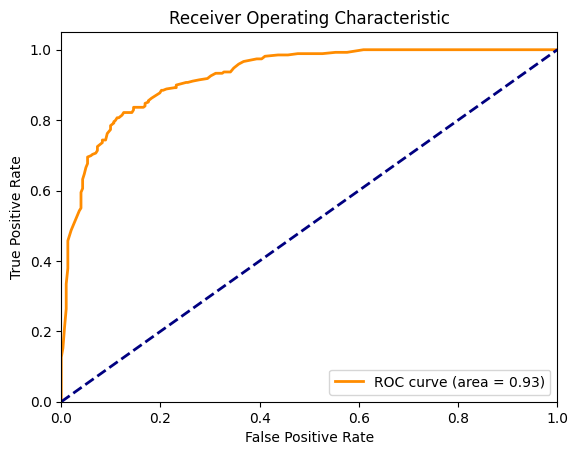

In [7]:
# Use cross_val_predict to get predicted probabilities
y_pred_prob = cross_val_predict(rf_model, X, y, cv=KFold(n_splits=10, shuffle=True, random_state=seed), method='predict_proba')

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y, y_pred_prob[:, 1])

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


# 4 WHITE WINE

In [8]:
df1= pd.read_csv('white_wine.csv') # read the dataframe into df

In [9]:
df1.head(5)

,citric acid,sulphates,alcohol,type
0,0.24,0.52,9.4,low
1,0.49,0.56,9.4,low
2,0.66,0.73,10.0,low
3,0.32,0.77,10.0,low
4,0.38,0.82,10.0,low


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   citric acid  78 non-null     float64
 1   sulphates    78 non-null     float64
 2   alcohol      78 non-null     float64
 3   type         78 non-null     object 
dtypes: float64(3), object(1)
memory usage: 2.6+ KB


In [11]:
# Encode the categorical 'type' column to numerical values
label_encoder = LabelEncoder()
df1['type'] = label_encoder.fit_transform(df1['type'])

# Separate features and target
X1 = df1.drop('type', axis=1)
y1 = df1['type']

# Load the trained Random Forest model from Q2
rf_model = RandomForestClassifier(random_state=42)

# Calculate AUC using cross-validation and print the average AUC
average_auc = cross_val_score(rf_model, X1, y1, cv=KFold(n_splits=10, shuffle=True, random_state=42), scoring="roc_auc").mean()

print(f' AUC Score on White Wine Dataset: {average_auc:.4f}')


 AUC Score on White Wine Dataset: 0.9615
